#Homework 4
##Rafael Barrera Quiroz C.C. 1035433047

##Perform multiple linear regression on the FuelConsumption.csv data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import preprocessing

In [2]:
df=pd.read_csv('FuelConsumption.txt')

In [3]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


##2D plot ENGINESIZE vs CO2EMISSIONS

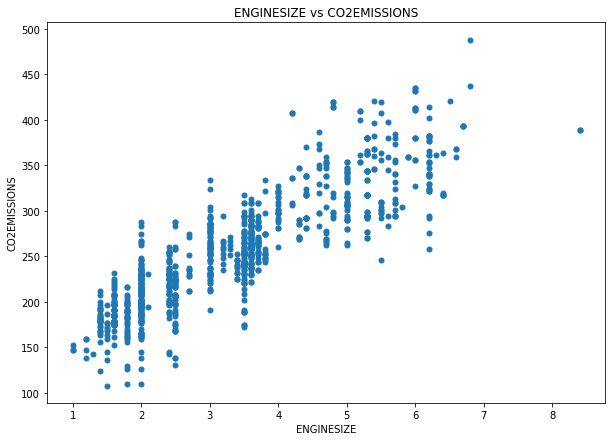

In [5]:
df.plot('ENGINESIZE','CO2EMISSIONS',kind='scatter',figsize=(10,7),title='ENGINESIZE vs CO2EMISSIONS',s=25);

##2D plot CYLINDERS vs CO2EMISSIONS and others

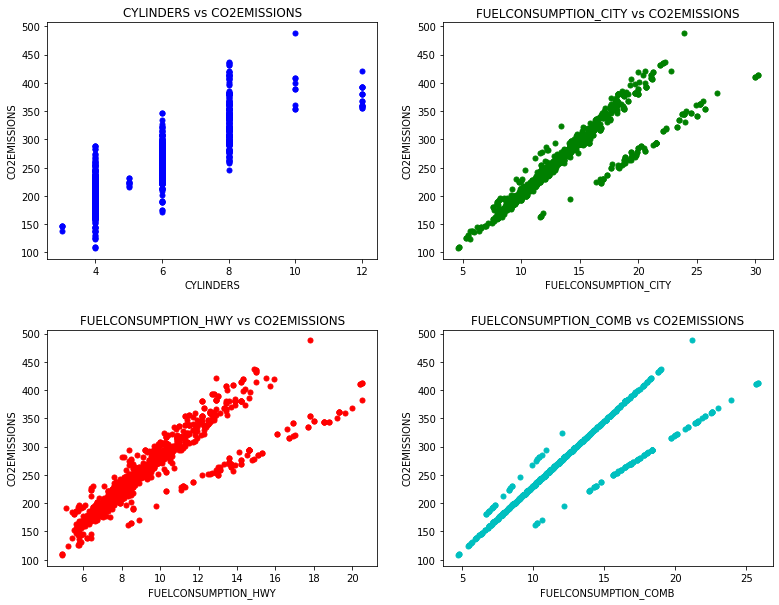

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(13,10))
plt.subplots_adjust(wspace=0.2, hspace=0.3)
df.plot('CYLINDERS','CO2EMISSIONS', kind='scatter',title='CYLINDERS vs CO2EMISSIONS',s=25,c='b',ax=axes[0,0])
df.plot('FUELCONSUMPTION_CITY','CO2EMISSIONS', kind='scatter',title='FUELCONSUMPTION_CITY vs CO2EMISSIONS',s=25,c='g',ax=axes[0,1])
df.plot('FUELCONSUMPTION_HWY','CO2EMISSIONS', kind='scatter',title='FUELCONSUMPTION_HWY vs CO2EMISSIONS',s=25,c='r',ax=axes[1,0])
df.plot('FUELCONSUMPTION_COMB','CO2EMISSIONS', kind='scatter',title='FUELCONSUMPTION_COMB vs CO2EMISSIONS',s=25,c='c',ax=axes[1,1]);

##3D plot CYLINDERS, ENGINESIZE vs CO2EMISSIONS

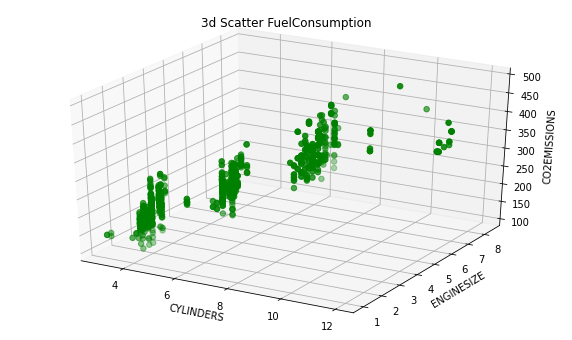

In [7]:
Cylinders=df['CYLINDERS'].to_numpy()
Engine=df['ENGINESIZE'].to_numpy()
Co2=df['CO2EMISSIONS'].to_numpy()

fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection ='3d')
ax.scatter(Cylinders, Engine, Co2, s=30, c='g')
ax.set_xlabel('CYLINDERS')
ax.set_ylabel('ENGINESIZE')
ax.set_zlabel('CO2EMISSIONS') 
ax.set_title('3d Scatter FuelConsumption')
plt.show()

##Feature Scaling

In [8]:
engine=np.reshape(df['ENGINESIZE'].to_numpy(),(-1,1))
cylinder=np.reshape(df['CYLINDERS'].to_numpy(),(-1,1))
fcc=np.reshape(df['FUELCONSUMPTION_CITY'].to_numpy(),(-1,1))
fch=np.reshape(df['FUELCONSUMPTION_HWY'].to_numpy(),(-1,1))
fc=np.reshape(df['FUELCONSUMPTION_COMB'].to_numpy(),(-1,1))
co2=np.reshape(df['CO2EMISSIONS'].to_numpy(),(-1,1))

In [9]:
engine_norm=preprocessing.StandardScaler().fit(engine).transform(engine)
cylinder_norm=preprocessing.StandardScaler().fit(cylinder).transform(cylinder)
fcc_norm=preprocessing.StandardScaler().fit(fcc).transform(fcc)
fch_norm=preprocessing.StandardScaler().fit(fch).transform(fch)
fc_norm=preprocessing.StandardScaler().fit(fc).transform(fc)
co2_norm=preprocessing.StandardScaler().fit(co2).transform(co2)

##Feature Scaling Plots

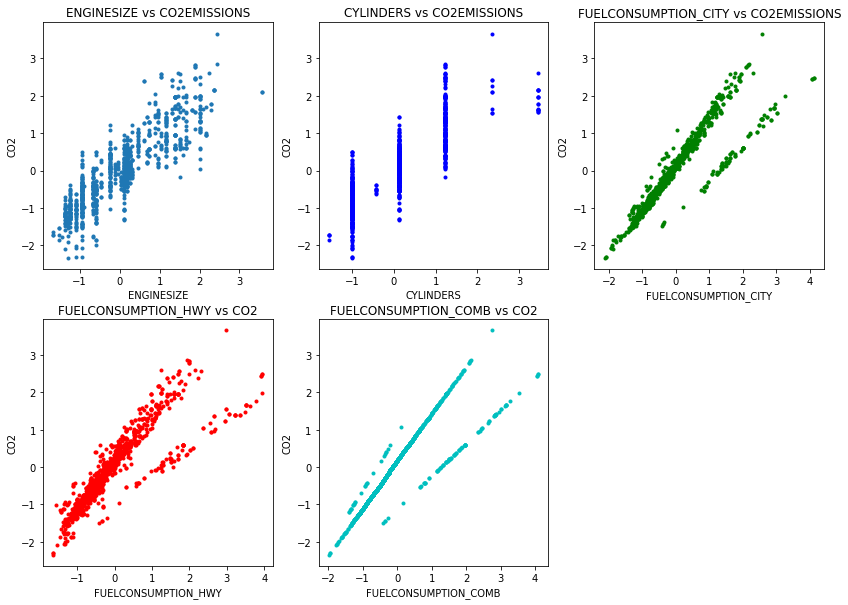

In [10]:
fig=plt.figure(figsize=(14,10))
ax0=fig.add_subplot(231)
plt.ylabel('CO2')
plt.xlabel('ENGINESIZE')
plt.title('ENGINESIZE vs CO2EMISSIONS')
ax1=fig.add_subplot(232)
plt.ylabel('CO2')
plt.xlabel('CYLINDERS')
plt.title('CYLINDERS vs CO2EMISSIONS')
ax2=fig.add_subplot(233)
plt.ylabel('CO2')
plt.xlabel('FUELCONSUMPTION_CITY')
plt.title('FUELCONSUMPTION_CITY vs CO2EMISSIONS')
ax3=fig.add_subplot(234)
plt.ylabel('CO2')
plt.xlabel('FUELCONSUMPTION_HWY')
plt.title('FUELCONSUMPTION_HWY vs CO2')
ax4=fig.add_subplot(235)
plt.ylabel('CO2')
plt.xlabel('FUELCONSUMPTION_COMB')
plt.title('FUELCONSUMPTION_COMB vs CO2')

ax0.plot(engine_norm,co2_norm,".")
ax1.plot(cylinder_norm,co2_norm,".b")
ax2.plot(fcc_norm,co2_norm,".g")
ax3.plot(fch_norm,co2_norm,".r")
ax4.plot(fc_norm,co2_norm,".c")
plt.show()

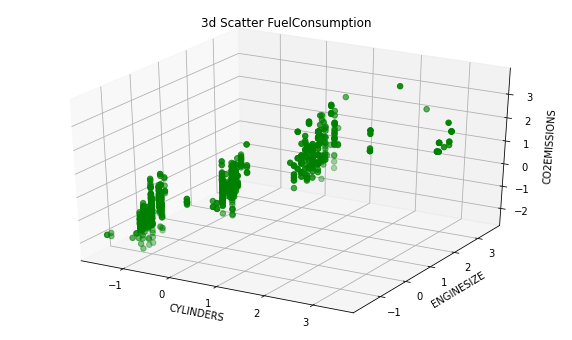

In [11]:
fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection ='3d')
ax.scatter(cylinder_norm, engine_norm, co2_norm, s=30, c='g')
ax.set_xlabel('CYLINDERS')
ax.set_ylabel('ENGINESIZE')
ax.set_zlabel('CO2EMISSIONS') 
ax.set_title('3d Scatter FuelConsumption')
plt.show()

##Linear Regression CO2EMISSIONS vs ENGINESIZE

###Train and Test Data

In [12]:
X_train, X_test, y_train, y_test = train_test_split(np.reshape(Engine, (-1,1)), np.reshape(Co2, (-1,1)), test_size=0.2)

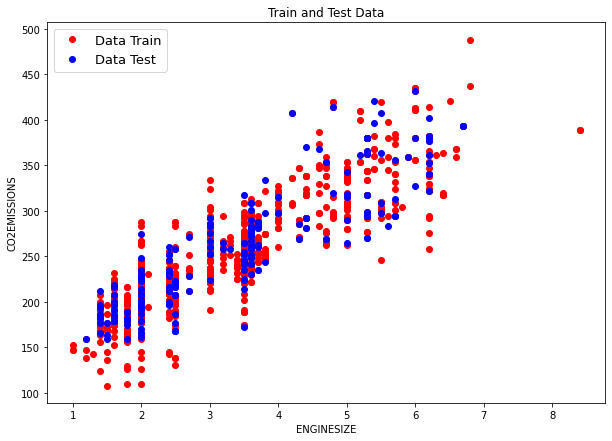

In [13]:
plt.figure(figsize=(10,7))
plt.plot(X_train, y_train,'or',label='Data Train')
plt.plot(X_test,y_test,'ob',label='Data Test')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.title('Train and Test Data')
plt.legend(loc='upper left',fontsize=13)
plt.show()

In [14]:
print(Engine.shape, Co2.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1067,) (1067,)
(853, 1) (853, 1)
(214, 1) (214, 1)


In [15]:
linear_regresion=linear_model.LinearRegression()
linear_regresion.fit(X_train, y_train)
intercept=linear_regresion.intercept_
coef=linear_regresion.coef_

###Linear Regression Plot Data Train

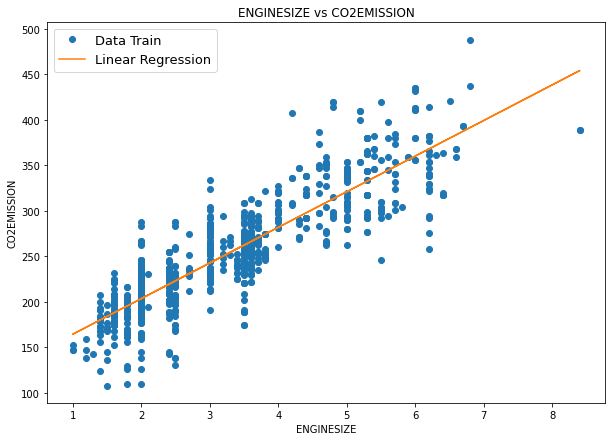

In [16]:
plt.figure(figsize=(10,7))
plt.plot(X_train, y_train, 'o',label='Data Train')
plt.plot(X_train, coef[0][0]*X_train+intercept[0],'-',label='Linear Regression')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSION')
plt.title('ENGINESIZE vs CO2EMISSION')
plt.legend(loc='upper left',fontsize=13)
plt.show()

$R^{2}$, $MAE$, $MAPE$

In [17]:
print('R^2=',linear_regresion.score(X_train, y_train))

R^2= 0.7630215945893877


In [18]:
print('MAE=',np.mean(np.abs(y_train-(coef*X_train+intercept))))

MAE= 23.22187379154334


In [19]:
print('MAPE=',100*np.mean(np.abs((y_train-(coef*X_train+intercept))/y_train)))

MAPE= 9.5047952725707


### Linear Regression Plot Data Test

In [20]:
predict=linear_regresion.predict(X_test)

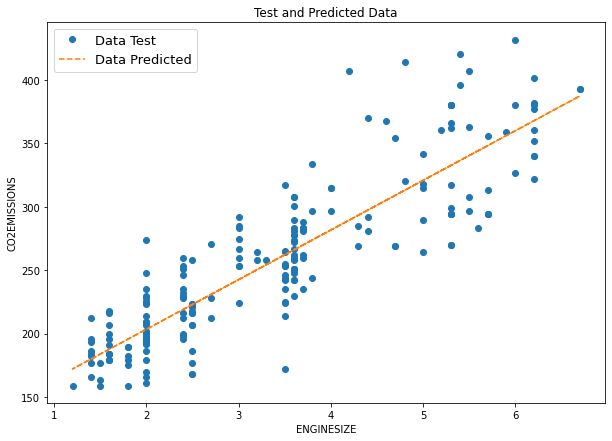

In [21]:
plt.figure(figsize=(10,7))
plt.plot(X_test,y_test, 'o',label='Data Test')
plt.plot(X_test, predict, '--',label='Data Predicted')
plt.legend(loc='upper left', fontsize=13)
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.title('Test and Predicted Data')
plt.show()

$R^{2}$, $MAE$, $MAPE$

In [22]:
print('R^2=',linear_regresion.score(X_test, y_test))

R^2= 0.7679798901223589


In [23]:
print('MAE=',np.mean(np.abs(y_test-predict)))

MAE= 23.81762706118109


In [24]:
print('MAPE=',100*np.mean(np.abs((y_test-predict)/y_test)))

MAPE= 9.107319877683011


###Comparision Between CO2EMISSIONS Predicted and CO2EMISSIONS Test Data to Arbitrary Ten Cars

In [25]:
w=np.random.randint(predict.shape[0], size=10)

In [26]:
for i in range(len(w)):
  print('CO2 test data =',y_test[w[i]][0],', CO2 predict data =',predict[w[i]][0])

CO2 test data = 184 , CO2 predict data = 187.7202690989718
CO2 test data = 248 , CO2 predict data = 203.38538820621275
CO2 test data = 317 , CO2 predict data = 332.6226208409506
CO2 test data = 177 , CO2 predict data = 179.88770954535133
CO2 test data = 380 , CO2 predict data = 360.0365792786223
CO2 test data = 283 , CO2 predict data = 269.9621444119868
CO2 test data = 184 , CO2 predict data = 179.88770954535133
CO2 test data = 361 , CO2 predict data = 328.70634106414036
CO2 test data = 230 , CO2 predict data = 219.0505073134537
CO2 test data = 290 , CO2 predict data = 266.0458646351766


##Linear Regression CYLINDERS, ENGINESIZE vs CO2EMISSIONS

In [27]:
X_data=df[{'ENGINESIZE','CYLINDERS'}]
y_data=df['CO2EMISSIONS']

In [28]:
X_data_np=X_data.to_numpy()
y_data_np=y_data.to_numpy()

###Train and Test Data

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_data_np, y_data_np, test_size=0.2)

In [30]:
X_train_1=[X_train[i][0] for i in range(X_train.shape[0])]
X_train_2=[X_train[i][1] for i in range(X_train.shape[0])]
X_test_1=[X_test[i][0] for i in range(X_test.shape[0])]
X_test_2=[X_test[i][1] for i in range(X_test.shape[0])]

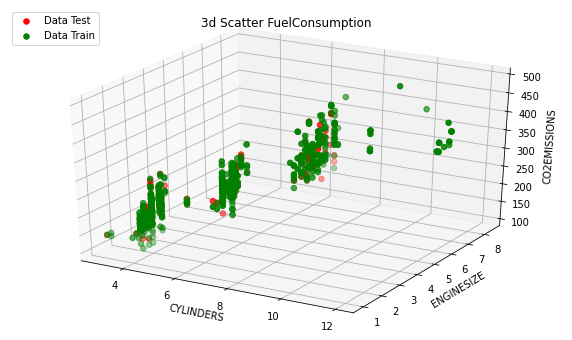

In [31]:
fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection ='3d')
ax.scatter(X_test_1, X_test_2, y_test, s=30, c='r',label='Data Test')
ax.scatter(X_train_1, X_train_2, y_train, s=30, c='g',label='Data Train')
ax.set_xlabel('CYLINDERS')
ax.set_ylabel('ENGINESIZE')
ax.set_zlabel('CO2EMISSIONS') 
ax.set_title('3d Scatter FuelConsumption')
plt.legend(loc='upper left')
plt.show()

In [32]:
linear_regresion.fit(X_train, y_train)

LinearRegression()

In [33]:
coef_1=linear_regresion.coef_[0]
coef_2=linear_regresion.coef_[1]
inter=linear_regresion.intercept_

In [34]:
X_train_1=np.array(X_train_1)
X_train_2=np.array(X_train_2)

###Linear Regression Plot Data Train

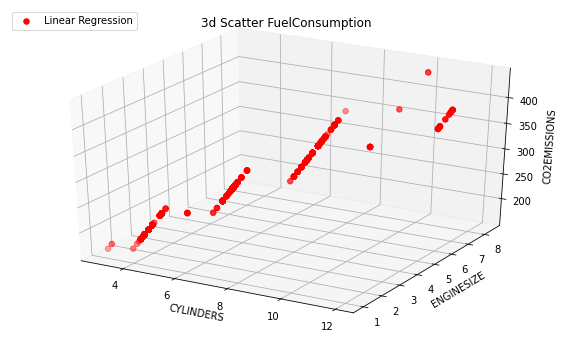

In [35]:
fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection ='3d')
ax.scatter(X_train_1, X_train_2, coef_1*X_train_1+coef_2*X_train_2+inter, s=30, c='r',label='Linear Regression')
ax.set_xlabel('CYLINDERS')
ax.set_ylabel('ENGINESIZE')
ax.set_zlabel('CO2EMISSIONS') 
ax.set_title('3d Scatter FuelConsumption')
plt.legend(loc='upper left')
plt.show()

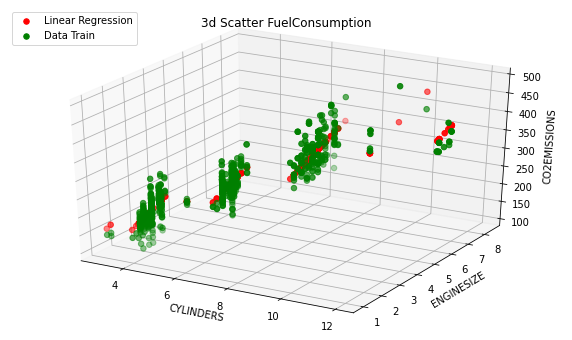

In [36]:
fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection ='3d')
ax.scatter(X_train_1, X_train_2, coef_1*X_train_1+coef_2*X_train_2+inter, s=30, c='r',label='Linear Regression')
ax.scatter(X_train_1, X_train_2, y_train, s=30, c='g',label='Data Train')
ax.set_xlabel('CYLINDERS')
ax.set_ylabel('ENGINESIZE')
ax.set_zlabel('CO2EMISSIONS') 
ax.set_title('3d Scatter FuelConsumption')
plt.legend(loc='upper left')
plt.show()

$R^{2}$, $MAE$, $MAPE$

In [37]:
print('R^2=',linear_regresion.score(X_train, y_train))

R^2= 0.7730741083843231


In [38]:
print('MAE=',np.mean(np.abs(y_train-(coef_1*X_train_1+coef_2*X_train_2+inter))))

MAE= 23.68137943471413


In [39]:
print('MAPE=',100*np.mean(np.abs((y_train-(coef_1*X_train_1+coef_2*X_train_2+inter))/y_train)))

MAPE= 9.612450442117918


###Liner Regression Plot Data Test

In [40]:
predict=linear_regresion.predict(X_test)

In [41]:
X_test_1=np.array(X_test_1)
X_test_2=np.array(X_test_2)

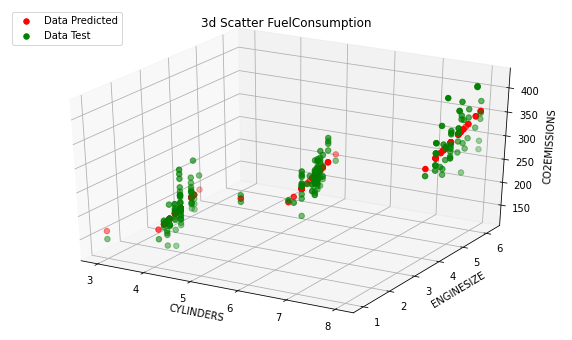

In [42]:
fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection ='3d')
ax.scatter(X_test_1, X_test_2, predict, s=30, c='r',label='Data Predicted')
ax.scatter(X_test_1, X_test_2, y_test, s=30, c='g',label='Data Test')
ax.set_xlabel('CYLINDERS')
ax.set_ylabel('ENGINESIZE')
ax.set_zlabel('CO2EMISSIONS') 
ax.set_title('3d Scatter FuelConsumption')
plt.legend(loc='upper left')
plt.show()

$R^{2}$, $MAE$, $MAPE$

In [43]:
print('R^2=',linear_regresion.score(X_test, y_test))

R^2= 0.7711116684764697


In [44]:
print('MAE=',np.mean(np.abs(y_test-predict)))

MAE= 21.398077811460677


In [45]:
print('MAPE=',100*np.mean(np.abs((y_test-predict)/y_test)))

MAPE= 8.499751316513727


###Comparision Between CO2EMISSIONS Predicted and CO2EMISSIONS Test Data to Arbitrary Ten Cars

In [46]:
w=np.random.randint(predict.shape[0], size=10)

In [47]:
for i in range(len(w)):
  print('CO2 test data =',y_test[w[i]],', CO2 predict data =',predict[w[i]])

CO2 test data = 228 , CO2 predict data = 201.61121173940882
CO2 test data = 177 , CO2 predict data = 190.62516649160222
CO2 test data = 239 , CO2 predict data = 234.92927993360132
CO2 test data = 196 , CO2 predict data = 201.61121173940882
CO2 test data = 198 , CO2 predict data = 196.11818911550552
CO2 test data = 294 , CO2 predict data = 339.65664223853685
CO2 test data = 225 , CO2 predict data = 212.59725698721542
CO2 test data = 232 , CO2 predict data = 259.6478817411662
CO2 test data = 246 , CO2 predict data = 262.3943930531178
CO2 test data = 179 , CO2 predict data = 190.62516649160222


##Linear Regression ALL FEATURES

In [48]:
X_data_all=df[{'ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB'}]
y_data=df['CO2EMISSIONS']

In [49]:
X_data_all_np=X_data_all.to_numpy()
y_data_np=y_data.to_numpy()

###Train and Test Data

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_data_all_np, y_data_np, test_size=0.2)

In [51]:
linear_regresion.fit(X_data_all_np,y_data_np)

LinearRegression()

In [52]:
print('R^2=',linear_regresion.score(X_train,y_train))

R^2= 0.8640995472697743


In [53]:
interc=linear_regresion.intercept_
coef=linear_regresion.coef_
train=X_train[:,0]*coef[0]+X_train[:,1]*coef[1]+X_train[:,2]*coef[2]+X_train[:,3]*coef[3]+X_train[:,4]*coef[4]+interc

$R^{2}$, $MAE$, $MAPE$

In [54]:
print('MAE=', np.mean(np.abs(y_train-train)))

MAE= 17.202439182514006


In [55]:
print('MAPE=',100*np.mean(np.abs((y_train-(train))/y_train)))

MAPE= 6.692663853968462


In [56]:
print('R^2=', linear_regresion.score(X_test,y_test))

R^2= 0.8641163252575094


In [57]:
predict=linear_regresion.predict(X_test)

In [58]:
print('MAE=', np.mean(np.abs(y_test-predict)))

MAE= 15.686625417913998


In [59]:
print('MAPE=',100*np.mean(np.abs((y_test-(predict))/y_test)))

MAPE= 6.242713710148829


###Comparision Between CO2EMISSIONS Predicted and CO2EMISSIONS Test Data to Arbitrary Ten Cars

In [60]:
w=np.random.randint(predict.shape[0], size=10)

In [61]:
for i in range(len(w)):
  print('CO2 test data =',y_test[w[i]],', CO2 predict data =',predict[w[i]])

CO2 test data = 177 , CO2 predict data = 190.6794381884968
CO2 test data = 294 , CO2 predict data = 308.42409219126966
CO2 test data = 359 , CO2 predict data = 368.1855608092184
CO2 test data = 172 , CO2 predict data = 183.18919101820052
CO2 test data = 159 , CO2 predict data = 173.5920255124821
CO2 test data = 177 , CO2 predict data = 190.6794381884968
CO2 test data = 258 , CO2 predict data = 229.68036565222658
CO2 test data = 216 , CO2 predict data = 206.07936275312997
CO2 test data = 250 , CO2 predict data = 298.9758922838541
CO2 test data = 179 , CO2 predict data = 192.22632076218508


Obsservese como el valor de $R^{2}$ mejora considerablemente para los datos de testeo, en la medida en que se agregan caracteristicas. Para el modelo lineal implementado ENGINESIZE vs CO2EMISSIONS, se alcanza el valor de 0.767, el cual pasa a 0.771 para el modelo ENGINESIZE, CYLINDERS vs CO2EMISSIONS, y por último logra el valor de 0.864 para un modelo implentado con todas las caracteristicas.

###Linear Regression ENGINESIZE vs CO2EMISSIONS Feature Scaling

###Train and Test Data

In [62]:
X_train, X_test, y_train, y_test = train_test_split(engine_norm, co2_norm, test_size=0.2)

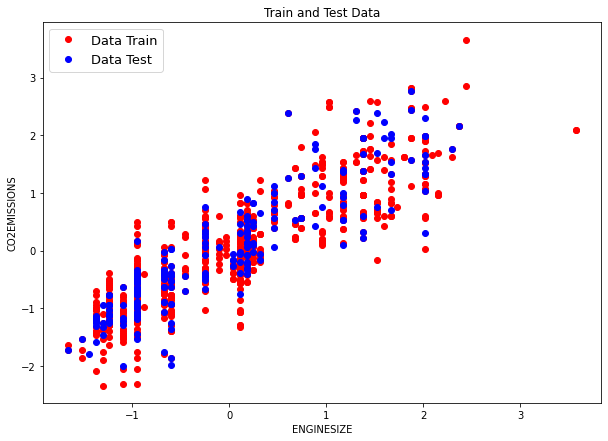

In [63]:
plt.figure(figsize=(10,7))
plt.plot(X_train, y_train,'or',label='Data Train')
plt.plot(X_test,y_test,'ob',label='Data Test')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.title('Train and Test Data')
plt.legend(loc='upper left',fontsize=13)
plt.show()

In [64]:
linear_regresion.fit(X_train, y_train)

LinearRegression()

In [65]:
intercept=linear_regresion.intercept_
coef=linear_regresion.coef_

In [66]:
intercept

array([-0.00616718])

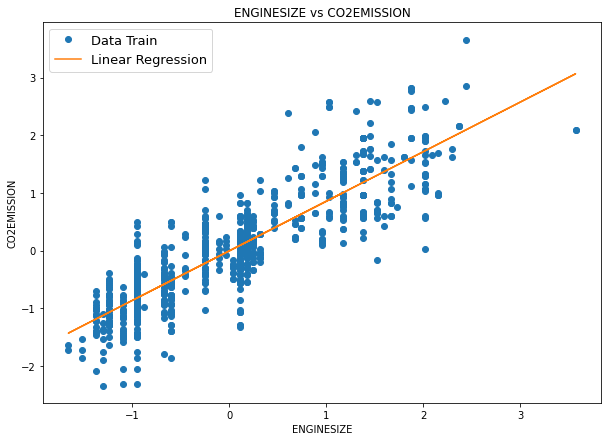

In [67]:
plt.figure(figsize=(10,7))
plt.plot(X_train, y_train, 'o',label='Data Train')
plt.plot(X_train, coef[0][0]*X_train+intercept[0],'-',label='Linear Regression')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSION')
plt.title('ENGINESIZE vs CO2EMISSION')
plt.legend(loc='upper left',fontsize=13)
plt.show()

$R^{2}$, $MAE$, $MAPE$

In [68]:
print('R^2=',linear_regresion.score(X_train, y_train))
print('MAE=',np.mean(np.abs(y_train-(coef[0][0]*X_train+intercept[0]))))
print('MAPE=',100*np.mean(np.abs((y_train-(coef[0][0]*X_train+intercept[0]))/y_train)))

R^2= 0.7539318246016782
MAE= 0.3707230326047289
MAPE= 118.23129168152265


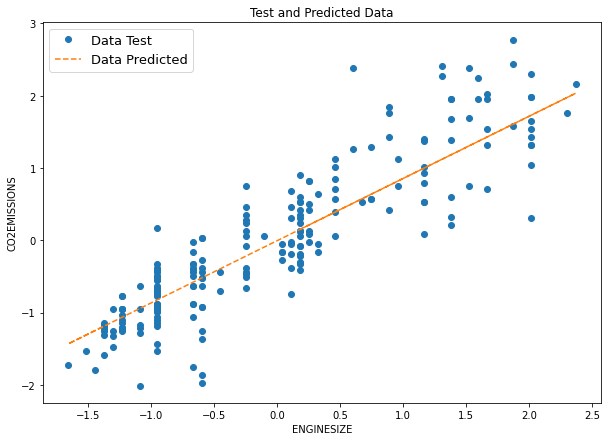

In [69]:
predict=linear_regresion.predict(X_test)
plt.figure(figsize=(10,7))
plt.plot(X_test,y_test, 'o',label='Data Test')
plt.plot(X_test, predict, '--',label='Data Predicted')
plt.legend(loc='upper left', fontsize=13)
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.title('Test and Predicted Data')
plt.show()

$R^{2}$, $MAE$, $MAPE$

In [70]:
print('R^2=',linear_regresion.score(X_test, y_test))
print('MAE=',np.mean(np.abs(y_test-predict)))
print('MAPE=',100*np.mean(np.abs((y_test-predict)/y_test)))

R^2= 0.7974022682803911
MAE= 0.3590966626391354
MAPE= 112.05074497517316


Observese como el valor de $R^{2}$ obtenido en el modelo lineal ENGINESIZE vs CO2EMISSIONS fue de 0.767 sin haber realizado el feature scaling. Para el modelo en que se aplica feature scaling se obtiene el valor de 0.797

###Comparision Between CO2EMISSIONS Predicted and CO2EMISSIONS Test Data to Arbitrary Ten Cars

In [71]:
w=np.random.randint(predict.shape[0], size=10)
for i in range(len(w)):
  print('CO2 test data =',y_test[w[i]][0],', CO2 predict data =',predict[w[i]][0])

CO2 test data = 1.2593628965369723 , CO2 predict data = 0.5126809604793505
CO2 test data = -0.2719919654006203 , CO2 predict data = 0.026470872832017694
CO2 test data = 0.3279202485543129 , CO2 predict data = 1.1812198309944328
CO2 test data = -0.745606871154515 , CO2 predict data = -0.8243967805508146
CO2 test data = -0.4456507641770483 , CO2 predict data = -0.2166341709916486
CO2 test data = 1.9539980916426845 , CO2 predict data = 1.1812198309944328
CO2 test data = 0.3437074120794427 , CO2 predict data = 0.14802339474385096
CO2 test data = 2.2381670350950214 , CO2 predict data = 1.3635486138621824
CO2 test data = -0.6982453805791254 , CO2 predict data = -0.8243967805508146
CO2 test data = 0.12268712272762523 , CO2 predict data = 0.2087996556997676
